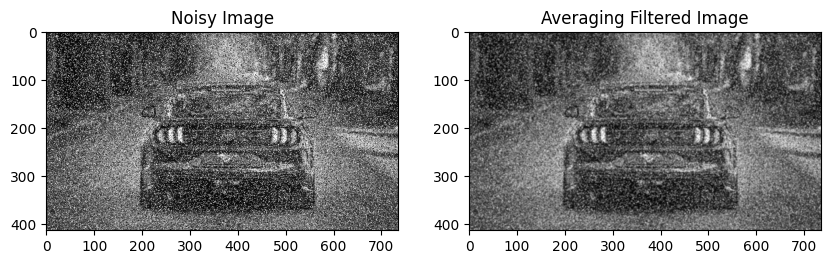

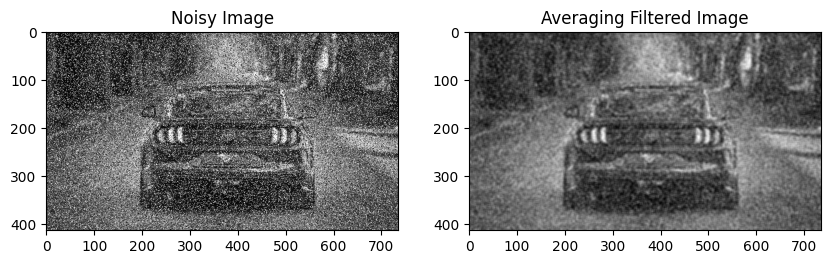

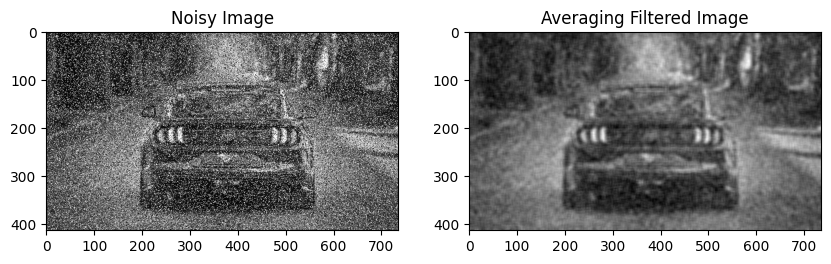

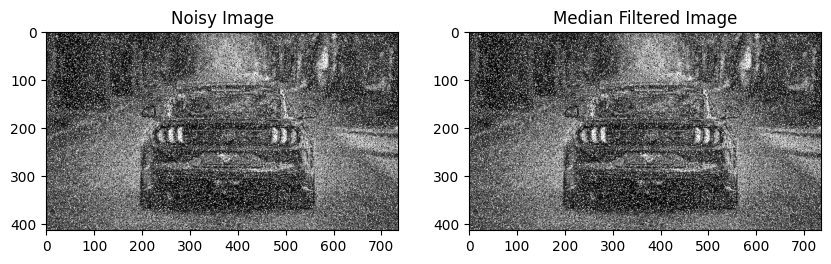

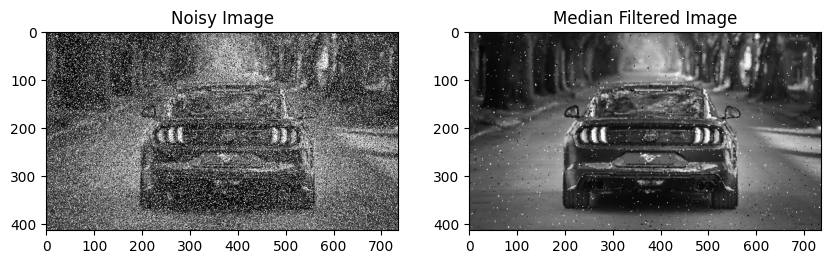

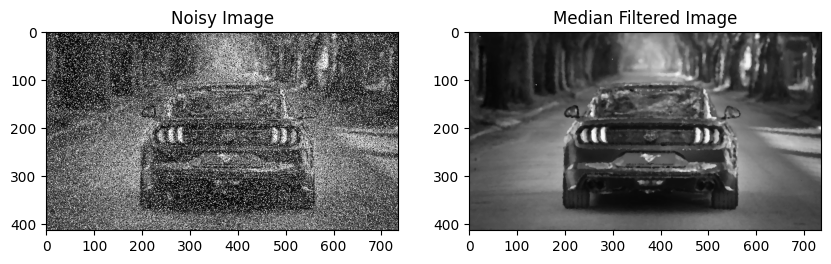

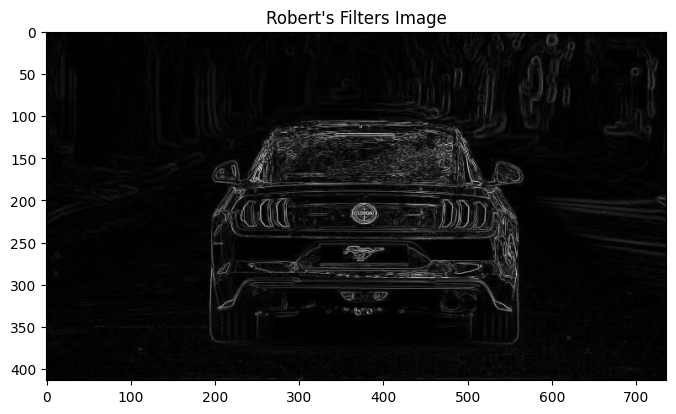

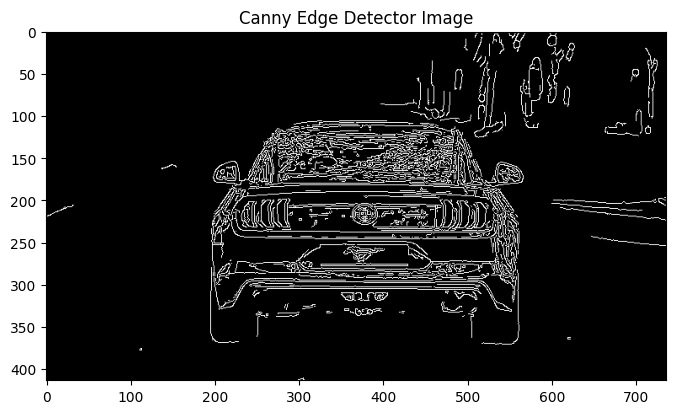

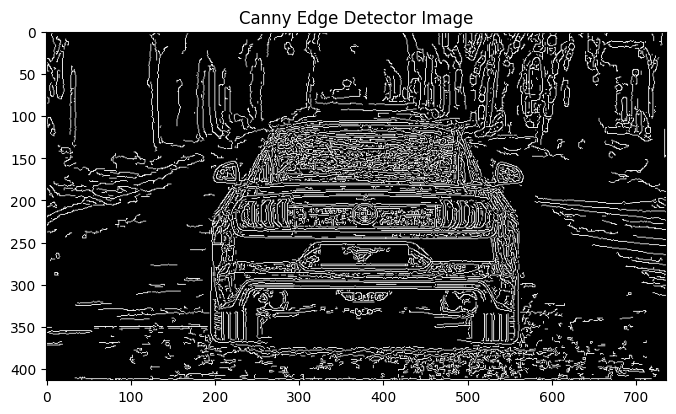

In [16]:
import cv2 as cv 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
from scipy import ndimage

def plot_image(image_1, image_2, title_1, title_2):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()

def averaging_filter(kernel_array):
    kernel = np.ones((kernel_array, kernel_array))/(kernel_array**2)
    image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)
    plot_image(noisy_image, image_filtered, "Noisy Image", "Averaging Filtered Image")
    
def median_filter(kernel_size):
    image_filtered = cv2.medianBlur(noisy_image, kernel_size)
    plot_image(noisy_image, image_filtered, "Noisy Image", "Median Filtered Image")

def robert_filter(gray_image):
    roberts_ver = np.array([[-1, 0 ],
                             [0,1 ]])
  
    roberts_hori = np.array([[ 0, -1 ],
                             [ 1, 0 ]])
    vertical = ndimage.convolve(image_gray, roberts_ver)
    horizontal = ndimage.convolve(image_gray, roberts_hori)
    robert_filter_image = np.sqrt(np.square(horizontal) + np.square(vertical))
    plt.figure(figsize=(8,8))
    plt.title("Robert's Filters Image")
    plt.imshow(robert_filter_image, cmap="gray")
    plt.show()
    
def canny_edge_detector(img, th1, th2):
    im_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv2.Canny(image=im_gray, threshold1=th1, threshold2=th2)
    plt.figure(figsize=(8,8))
    plt.title("Canny Edge Detector Image")
    plt.imshow(edges, cmap="gray")
    plt.show()
    
url = "https://i.pinimg.com/736x/b4/a3/79/b4a379bc55ab03860395b8f5d0a86b81.jpg"
image = io.imread(url)
image_gray = color.rgb2gray(image)
rows,cols = image_gray.shape
noisy_image = np.zeros((rows, cols), dtype = np.float32)
pepper = 0.15
salt = 1-pepper
for i in range(rows):
    for j in range(cols):
        rdn = np.random.random();
        if rdn<pepper:
            noisy_image[i][j] = 0
        elif rdn>salt:
            noisy_image[i][j] = 1
        else:
            noisy_image[i][j] = image_gray[i][j]

averaging_filter(3)
averaging_filter(6)
averaging_filter(9)
#When we create our kernel with the value of 1/9 of each of our array while using the averaging filter, we see that a 
#slight blur and noise in the image do not decrease much.When we reduce the values in the array as 1/36 and 1/81, 
#respectively, we observe that the noise of the image decreases, but the image becomes more blurred.

median_filter(1)
median_filter(3)
median_filter(5)
#When using the medain filter, we observe that if we make our kernel size 1, the noise is still too much, if we make 3,
#the noise is very reduced and the image is almost gray, but if we make our size 5, we get rid of the noise and reach the gray
#of the image.

robert_filter(image_gray)

canny_edge_detector(image, 100, 200)
canny_edge_detector(image, 30, 60)
#When we take the thresholds of 30-60, the pixel intensities seems to be distributed all over the image. However, when we 
#increase the thresholds and get 100-200, the majority of the pixel intensities is gathered in the middle of the image where 
#the car is
